In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [120]:
df=pd.read_csv(r"C:\Users\AYUSHI\Desktop\Flip Robo\Car Price Prediction\Data_Used_Cars.csv")

In [121]:
df

,Manuf_Year,Brand,Model,Variant,Driver_KM,Fuel,Transmission,Location,Price
0,2020,Tata,Altroz,XZ,19955.0,Petrol,Manual,Mumbai,749000
1,2012,Maruti,Wagon R,VXI,28677.0,Petrol,Manual,Mumbai,265000
2,2015,Honda,Mobilio,V i-VTEC,58284.0,Petrol,Manual,Mumbai,561000
3,2017,Maruti,Baleno,1.2 CVT Delta,54037.0,Petrol,Automatic,Mumbai,655000
4,2014,Honda,Amaze,S AT i-Vtech,67108.0,Petrol,Automatic,Mumbai,451000
...,...,...,...,...,...,...,...,...,...
5015,2016,Maruti,Vitara Brezza,ZDi Plus,43000.0,Diesel,Manual,New Delhi,700000
5016,2017,Maruti,Swift Dzire,ZDI Plus,41000.0,Diesel,Manual,New Delhi,665000
5017,2010,Honda,City,S,106000.0,Petrol,Manual,New Delhi,295000
5018,2013,Honda,Amaze,S i-Vtech,80000.0,Petrol,Manual,New Delhi,375000


In [122]:
df.columns

Index(['Manuf_Year', 'Brand', 'Model', 'Variant', 'Driver_KM', 'Fuel',
       'Transmission', 'Location', 'Price'],
      dtype='object')

In [123]:
df.isnull().sum()

Manuf_Year       0
Brand            0
Model            0
Variant          0
Driver_KM        0
Fuel             0
Transmission    12
Location         0
Price            0
dtype: int64

In [124]:
df.dtypes

Manuf_Year        int64
Brand            object
Model            object
Variant          object
Driver_KM       float64
Fuel             object
Transmission     object
Location         object
Price             int64
dtype: object

In [125]:
df['Transmission']=df['Transmission'].replace('',np.nan)

In [126]:
from statistics import mode
df['Transmission']=df['Transmission'].fillna(mode(df["Transmission"]))

In [127]:
df.isnull().sum()

Manuf_Year      0
Brand           0
Model           0
Variant         0
Driver_KM       0
Fuel            0
Transmission    0
Location        0
Price           0
dtype: int64

## Visualisation of data

In [128]:
Columns=[]
Columns=df.columns
Columns

Index(['Manuf_Year', 'Brand', 'Model', 'Variant', 'Driver_KM', 'Fuel',
       'Transmission', 'Location', 'Price'],
      dtype='object')

2016    641
2015    599
2017    553
2018    539
2014    534
2013    485
2019    361
2012    299
2011    260
2020    240
2021    166
2010    154
2009     92
2008     53
2007     33
2004      3
2022      3
2006      2
2005      2
2002      1
Name: Manuf_Year, dtype: int64
Maruti           1261
Hyundai           935
Honda             565
Toyota            371
Mercedes-Benz     337
Mahindra          292
Volkswagen        198
BMW               160
Ford              136
Skoda             117
Audi              114
Tata              110
Renault            82
Nissan             64
MG                 47
Kia                40
Chevrolet          34
Land               29
Jaguar             29
Datsun             23
Volvo              19
Jeep               19
Porsche            13
Mini               12
Fiat                6
Mitsubishi          4
Isuzu               2
Aston               1
Name: Brand, dtype: int64
City         270
i20          238
Wagon R      195
Baleno       167
Swift        165
  

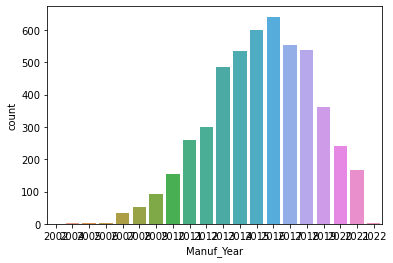

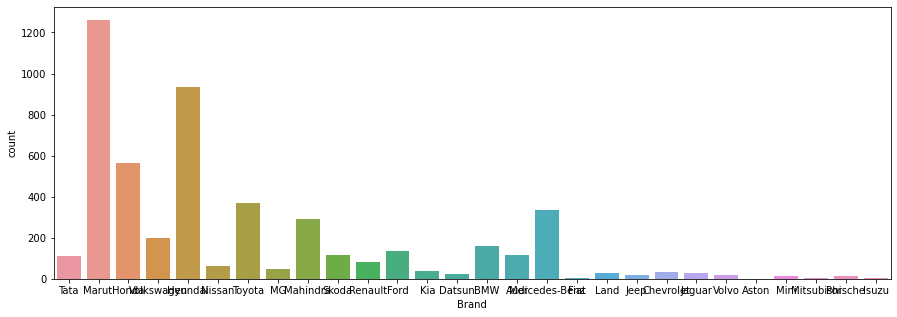

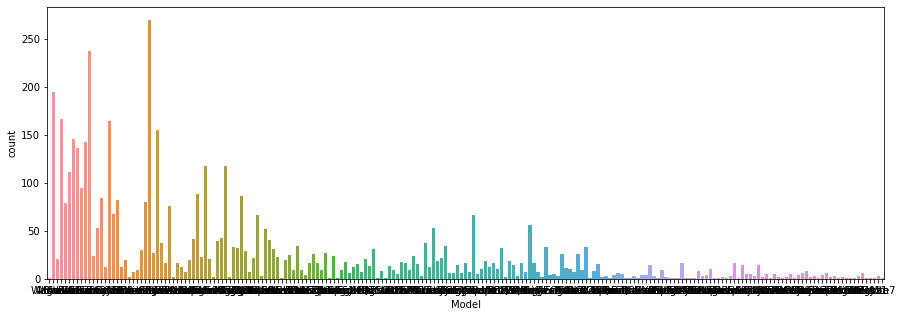

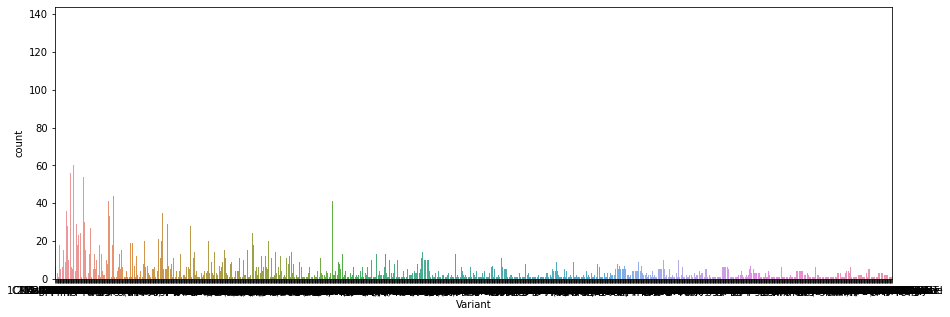

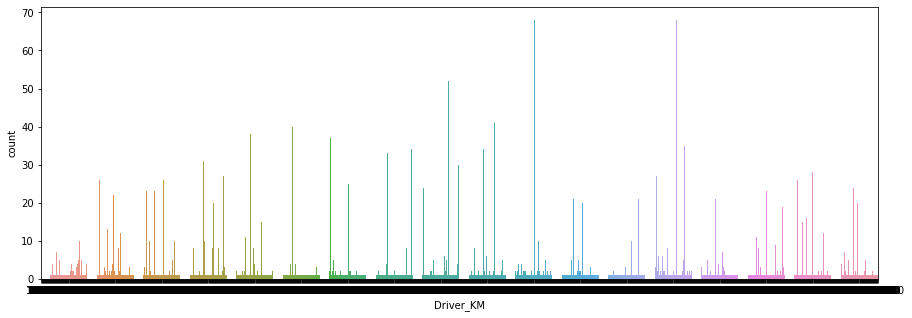

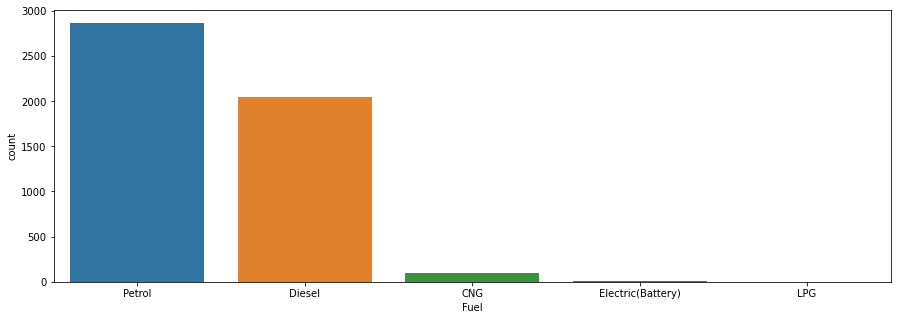

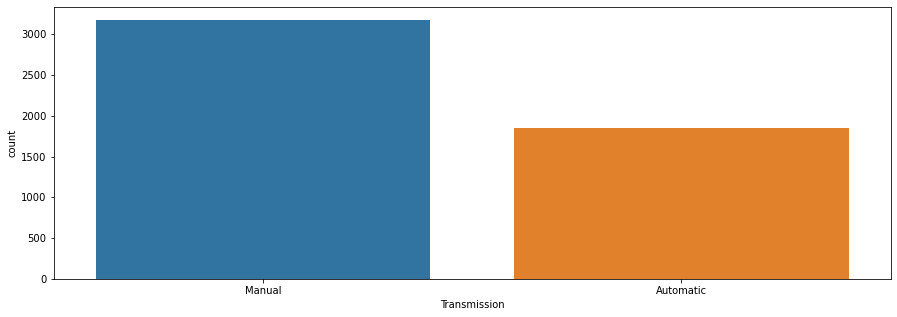

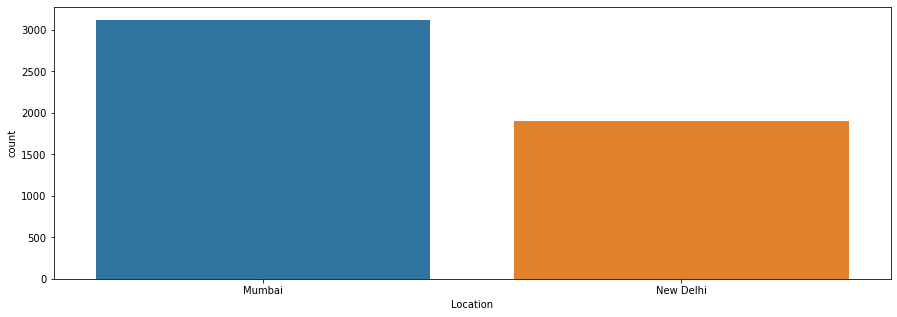

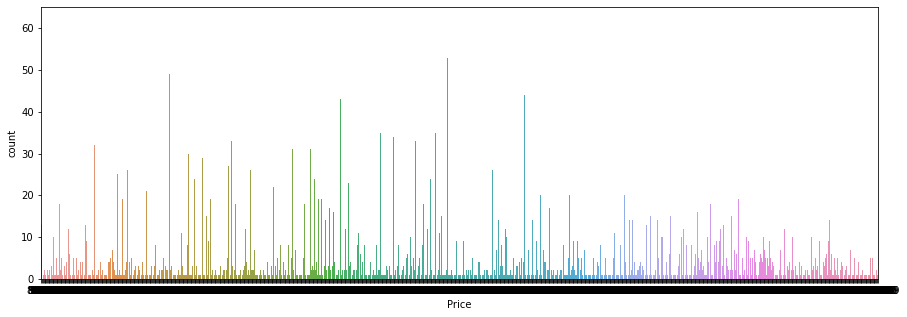

<Figure size 1080x360 with 0 Axes>

In [129]:
import matplotlib.pyplot as plt  
for i in Columns:
    print(df[i].value_counts())
    ax=sns.countplot(x=i,data=df)
    plt.figure(figsize=(15,5))

In [70]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [71]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [72]:
df

,Manuf_Year,Brand,Model,Variant,Driver_KM,Fuel,Transmission,Location,Price
0,2020,24.0,21.0,1071.0,19955.0,4.0,1.0,0.0,749000
1,2012,16.0,185.0,989.0,28677.0,4.0,1.0,0.0,265000
2,2015,7.0,117.0,947.0,58284.0,4.0,1.0,0.0,561000
3,2017,16.0,31.0,34.0,54037.0,4.0,0.0,0.0,655000
4,2014,7.0,24.0,838.0,67108.0,4.0,0.0,0.0,451000
...,...,...,...,...,...,...,...,...,...
5015,2016,16.0,183.0,1086.0,43000.0,1.0,1.0,1.0,700000
5016,2017,16.0,165.0,1082.0,41000.0,1.0,1.0,1.0,665000
5017,2010,7.0,44.0,830.0,106000.0,4.0,1.0,1.0,295000
5018,2013,7.0,24.0,852.0,80000.0,4.0,1.0,1.0,375000


In [73]:
df.corr()

,Manuf_Year,Brand,Model,Variant,Driver_KM,Fuel,Transmission,Location,Price
Manuf_Year,1.000000,0.053177,-0.081990,-0.013437,-0.417049,0.002706,-0.179565,0.080618,0.370090
Brand,0.053177,1.000000,0.122828,-0.015577,0.045050,-0.096197,0.014932,-0.053316,0.001306
Model,-0.081990,0.122828,1.000000,0.162888,0.027092,-0.049646,0.178939,-0.030193,-0.169428
Variant,-0.013437,-0.015577,0.162888,1.000000,-0.051550,0.030950,0.167455,-0.010549,-0.111577
Driver_KM,-0.417049,0.045050,0.027092,-0.051550,1.000000,-0.245559,0.076566,0.024868,-0.149618
Fuel,0.002706,-0.096197,-0.049646,0.030950,-0.245559,1.000000,0.104704,-0.058773,-0.282448
Transmission,-0.179565,0.014932,0.178939,0.167455,0.076566,0.104704,1.000000,-0.003998,-0.505623
Location,0.080618,-0.053316,-0.030193,-0.010549,0.024868,-0.058773,-0.003998,1.000000,0.072809
Price,0.370090,0.001306,-0.169428,-0.111577,-0.149618,-0.282448,-0.505623,0.072809,1.000000


In [74]:
df.corr()['Price'].sort_values(ascending=False)

Price           1.000000
Manuf_Year      0.370090
Location        0.072809
Brand           0.001306
Variant        -0.111577
Driver_KM      -0.149618
Model          -0.169428
Fuel           -0.282448
Transmission   -0.505623
Name: Price, dtype: float64

<AxesSubplot:>

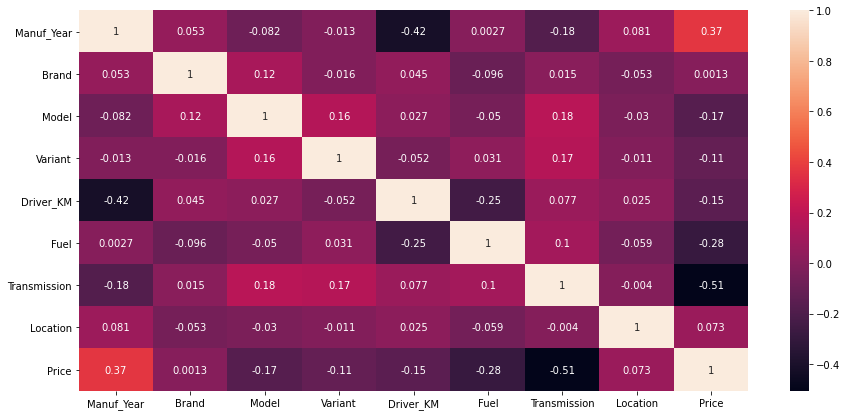

In [75]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [76]:
df.describe()

,Manuf_Year,Brand,Model,Variant,Driver_KM,Fuel,Transmission,Location,Price
count,5020.000000,5020.000000,5020.000000,5020.000000,5.020000e+03,5020.000000,5020.00000,5020.000000,5.020000e+03
mean,2015.307371,13.773307,109.000000,630.448606,5.078492e+04,2.695418,0.63247,0.378486,1.013046e+06
std,3.067246,6.828209,64.159783,341.426135,3.984065e+04,1.511680,0.48218,0.485058,1.161210e+06
min,2002.000000,0.000000,0.000000,0.000000,6.400000e+01,0.000000,0.00000,0.000000,0.000000e+00
25%,2013.000000,8.000000,49.000000,339.000000,2.796800e+04,1.000000,0.00000,0.000000,4.100000e+05
50%,2015.000000,16.000000,98.000000,669.500000,4.900000e+04,4.000000,1.00000,0.000000,6.000000e+05
75%,2018.000000,17.000000,170.000000,946.000000,6.815000e+04,4.000000,1.00000,1.000000,1.075000e+06
max,2022.000000,27.000000,208.000000,1162.000000,1.550000e+06,4.000000,1.00000,1.000000,9.999999e+06


In [77]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [78]:
x.skew().sort_values(ascending=False)

Driver_KM       14.316185
Location         0.501228
Brand            0.151847
Model            0.067205
Variant         -0.211369
Fuel            -0.318686
Manuf_Year      -0.325002
Transmission    -0.549682
dtype: float64

In [79]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [80]:
type(x_new)

numpy.ndarray

In [81]:
x=pd.DataFrame(x_new,columns=x.columns)

In [82]:
x

,Manuf_Year,Brand,Model,Variant,Driver_KM,Fuel,Transmission,Location
0,1.593123,1.417255,-1.509017,1.237875,-1.010595,0.863250,0.762301,-0.780368
1,-1.082330,0.382058,1.123749,1.025048,-0.597250,0.863250,0.762301,-0.780368
2,-0.135695,-0.974694,0.240701,0.914905,0.412535,0.863250,0.762301,-0.780368
3,0.532320,0.382058,-1.259779,-1.889986,0.290297,0.863250,-1.311818,-0.780368
4,-0.458461,-0.974694,-1.430425,0.625117,0.650669,0.863250,-1.311818,-0.780368
...,...,...,...,...,...,...,...,...
5015,0.194509,0.382058,1.099743,1.276506,-0.056625,-1.122498,0.762301,1.281447
5016,0.532320,0.382058,0.879050,1.266213,-0.124943,-1.122498,0.762301,1.281447
5017,-1.678366,-0.974694,-0.976594,0.603608,1.524762,0.863250,0.762301,1.281447
5018,-0.773952,-0.974694,-1.430425,0.662675,0.967438,0.863250,0.762301,1.281447


In [83]:
x.skew().sort_values(ascending=False)

Location        0.501228
Driver_KM       0.246564
Brand          -0.112267
Manuf_Year     -0.155030
Model          -0.215214
Fuel           -0.317272
Variant        -0.352720
Transmission   -0.549682
dtype: float64

In [84]:
sk=x.skew()

In [85]:
sk[np.abs(sk)>0.25].all()

True

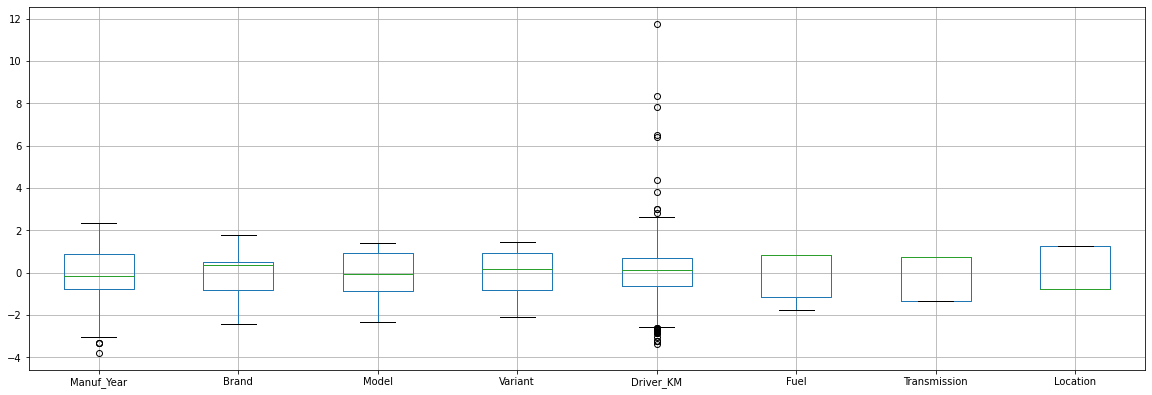

In [86]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [88]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [89]:
new_df=pd.concat([x,y],axis=1)
new_df

,Manuf_Year,Brand,Model,Variant,Driver_KM,Fuel,Transmission,Location,Price
0,1.593123,1.417255,-1.509017,1.237875,-1.010595,0.863250,0.762301,-0.780368,749000
1,-1.082330,0.382058,1.123749,1.025048,-0.597250,0.863250,0.762301,-0.780368,265000
2,-0.135695,-0.974694,0.240701,0.914905,0.412535,0.863250,0.762301,-0.780368,561000
3,0.532320,0.382058,-1.259779,-1.889986,0.290297,0.863250,-1.311818,-0.780368,655000
4,-0.458461,-0.974694,-1.430425,0.625117,0.650669,0.863250,-1.311818,-0.780368,451000
...,...,...,...,...,...,...,...,...,...
5015,0.194509,0.382058,1.099743,1.276506,-0.056625,-1.122498,0.762301,1.281447,700000
5016,0.532320,0.382058,0.879050,1.266213,-0.124943,-1.122498,0.762301,1.281447,665000
5017,-1.678366,-0.974694,-0.976594,0.603608,1.524762,0.863250,0.762301,1.281447,295000
5018,-0.773952,-0.974694,-1.430425,0.662675,0.967438,0.863250,0.762301,1.281447,375000


In [90]:
from scipy.stats import zscore
z=np.abs(zscore(new_df))
new_df=new_df[(z<3).all(axis=1)]

In [91]:
x=new_df.drop("Price",axis=1)
y=new_df["Price"]

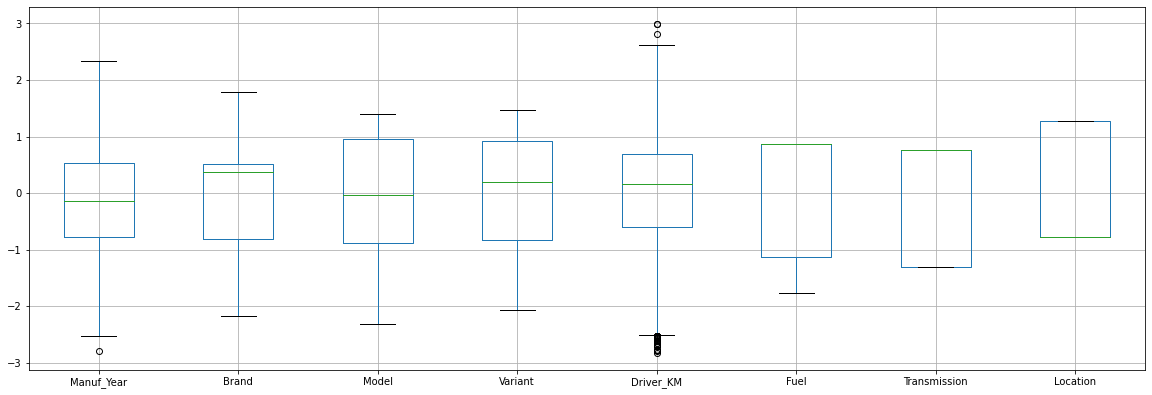

In [92]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [93]:
x

,Manuf_Year,Brand,Model,Variant,Driver_KM,Fuel,Transmission,Location
0,1.593123,1.417255,-1.509017,1.237875,-1.010595,0.863250,0.762301,-0.780368
1,-1.082330,0.382058,1.123749,1.025048,-0.597250,0.863250,0.762301,-0.780368
2,-0.135695,-0.974694,0.240701,0.914905,0.412535,0.863250,0.762301,-0.780368
3,0.532320,0.382058,-1.259779,-1.889986,0.290297,0.863250,-1.311818,-0.780368
4,-0.458461,-0.974694,-1.430425,0.625117,0.650669,0.863250,-1.311818,-0.780368
...,...,...,...,...,...,...,...,...
5015,0.194509,0.382058,1.099743,1.276506,-0.056625,-1.122498,0.762301,1.281447
5016,0.532320,0.382058,0.879050,1.266213,-0.124943,-1.122498,0.762301,1.281447
5017,-1.678366,-0.974694,-0.976594,0.603608,1.524762,0.863250,0.762301,1.281447
5018,-0.773952,-0.974694,-1.430425,0.662675,0.967438,0.863250,0.762301,1.281447


In [94]:
y

0       749000
1       265000
2       561000
3       655000
4       451000
         ...  
5015    700000
5016    665000
5017    295000
5018    375000
5019    450000
Name: Price, Length: 4854, dtype: int64

## Model Building

In [95]:
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score

In [96]:
for i in range (0,1000) :
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"at random state {i},the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"at random state {i},the testing accuracy is :{r2_score(y_test,pred_test)}") 
    print("\n")

at random state 0,the training accuracy is :0.48304594143476554
at random state 0,the testing accuracy is :0.46640430527218935


at random state 1,the training accuracy is :0.49386042797012863
at random state 1,the testing accuracy is :0.4166869579922806


at random state 2,the training accuracy is :0.4770208034449933
at random state 2,the testing accuracy is :0.49139923232905625


at random state 3,the training accuracy is :0.4810941600247335
at random state 3,the testing accuracy is :0.47618075187318987


at random state 4,the training accuracy is :0.4756490805010858
at random state 4,the testing accuracy is :0.49595335051769984


at random state 5,the training accuracy is :0.4766980211132805
at random state 5,the testing accuracy is :0.4869578637765011


at random state 6,the training accuracy is :0.4787183754569453
at random state 6,the testing accuracy is :0.4832380272938227


at random state 7,the training accuracy is :0.4764882331155048
at random state 7,the testing accuracy is 

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=243)

In [98]:
x_train.shape

(3883, 8)

In [99]:
y_train.shape

(3883,)

In [100]:
x_test.shape

(971, 8)

In [101]:
y_test.shape

(971,)

In [102]:
lr.fit(x_train,y_train)

LinearRegression()

In [103]:
pred_test=lr.predict(x_test)

In [104]:
print(r2_score(y_test,pred_test))

0.479580276552362


## CROSS VALIDATION

In [105]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is 0.4525594757627446 and accuracy score for training is -0.45143334664186674and accuracy score for testing is 0.479580276552362


At cross fold 3 the cv score is 0.42130512617272714 and accuracy score for training is -0.45143334664186674and accuracy score for testing is 0.479580276552362


At cross fold 4 the cv score is 0.39296877231381266 and accuracy score for training is -0.45143334664186674and accuracy score for testing is 0.479580276552362


At cross fold 5 the cv score is 0.39708946528242617 and accuracy score for training is -0.45143334664186674and accuracy score for testing is 0.479580276552362


At cross fold 6 the cv score is 0.3736983267994745 and accuracy score for training is -0.45143334664186674and accuracy score for testing is 0.479580276552362


At cross fold 7 the cv score is 0.31608372824455394 and accuracy score for training is -0.45143334664186674and accuracy score for testing is 0.479580276552362


At cross fold 8 the cv score is 0.22

## Plot the Data

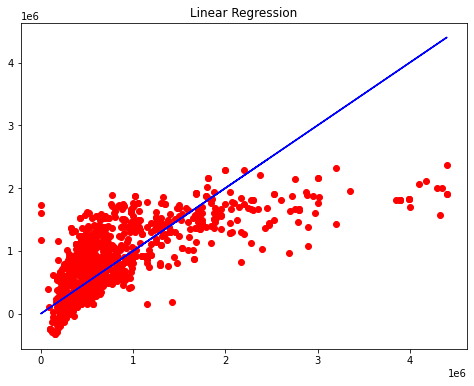

In [106]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regression")
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [108]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [109]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.47958273859563183

In [113]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.45256293067365183

## Ensemble technique:

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [112]:
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [115]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=2)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 94.04459510036575
Cross Val Score: 78.63508902716316


## we are getting our model accuracy around 94% and cross validation around 78 % which shows our model is performing good but there is overfitting as there is less data and also the data can be captured in a better way

In [116]:
import pickle

In [117]:
filename='Car_Price_Prediction.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [118]:
loaded_model= pickle.load(open('Car_Price_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9404459510036576


In [119]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,961,962,963,964,965,966,967,968,969,970
predicted,775047.978667,3112860.04,335653.34,2829629.45,973230.0,715934.45,357040.42,1836985.8,2685606.0,252600.01,...,1343532.12,225383.12,1049760.0,534300.0,1047031.0,573330.71,573123.14,507460.0,380412.82,2318497.86
original,775047.978667,3112860.04,335653.34,2829629.45,973230.0,715934.45,357040.42,1836985.8,2685606.0,252600.01,...,1343532.12,225383.12,1049760.0,534300.0,1047031.0,573330.71,573123.14,507460.0,380412.82,2318497.86
